In [ ]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import math as m

###**Task 1**

Define Membership functions to be used.

1.   Triangular
2.   Trapezoid
3.   Bell
4.   Gaussian


In [ ]:
# Triangular Membership Function
def triangular(x, a, b, c):
    response = 0
    if x <= a or c <= x:
        response = 0
    if a <= x and x <= b:
        response = (x-a) / (b-a)
    if b <= x and x <= c:
        response = (c-x) / (c-b)
    return response


In [ ]:
# Trapezoid Membership Function
def trapezoid(x, a, b, c, d):
    response = 0
    if x <= a and d <= x:
        response = 0
    if a <= x and x <= b:
        response = (x-a) / (b-a)
    if b <= x and x <= c:
        response = 1
    if c <= x and x <= d:
        response = (d-x) / (d-c)
    return response


In [ ]:
# Bell Membership Function

def bell(x, a, b, c):
    if a > 0:
        return 1 / (1 + ((x-c)/a) ** (2 * b))
    else:
        return 0


In [ ]:
# Gaussian Membership Function
def gaussian(x, c, t):
    if t > 0:
        return m.e ** (-1/2 * ((x-c) / t) ** 2)
    else:
        return 0


Parameter definition

In [ ]:
a = 2
b = 4
c = 5
d = 8
t = 2

Input Generation

In [ ]:
x_vals = np.linspace(0, 10, 10, dtype=int,endpoint=False)
x_vals

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Fuzzification Stage


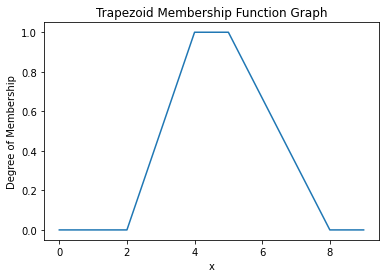

In [ ]:
# Fuzzification using trapezoid membership function

trap_vals = [trapezoid(x, a,b,c,d) for x in x_vals]
plt.plot(x_vals, trap_vals)
plt.title('Trapezoid Membership Function Graph')
plt.xlabel('x')
plt.ylabel('Degree of Membership')
plt.show()


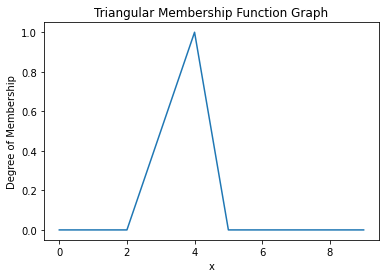

In [ ]:
# Fuzzification using triangular membership function

tri_vals = [triangular(x, a,b,c,) for x in x_vals]
plt.plot(x_vals, tri_vals)
plt.title('Triangular Membership Function Graph')
plt.xlabel('x')
plt.ylabel('Degree of Membership')
plt.show()


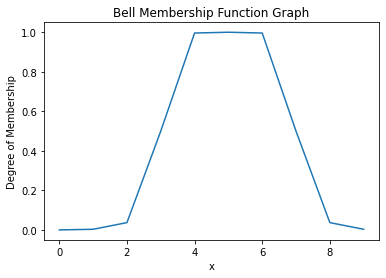

In [ ]:
# Fuzzification using bell membership function

bel_vals = [bell(x, a,b,c,) for x in x_vals]
plt.plot(x_vals, bel_vals)
plt.title('Bell Membership Function Graph')
plt.xlabel('x')
plt.ylabel('Degree of Membership')
plt.show()


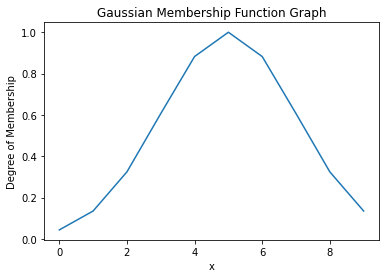

In [ ]:
# Fuzzification using bell membership function

gau_vals = [gaussian(x,c,t) for x in x_vals]
plt.plot(x_vals, gau_vals)
plt.title('Gaussian Membership Function Graph')
plt.xlabel('x')
plt.ylabel('Degree of Membership')
plt.show()

###**Task 2**

Define Defuzzification methods


1.   Smallest of Max
2.   Largest of Max
3.   Centroid of Area
4.   Mean of Max



In [ ]:
# Smallest of Max
def smallest_of_max(x_input):
    return min(x_input)


In [ ]:
# Largest of Max
def largest_of_max(x_input=[]):
    return max(x_input)

In [ ]:
# Centroid of Area
def centroid_of_area(fuzz_output=[], input=[]):
    num = 0.0
    denum = 0.0
    for i in range(0, len(input)):
        num += fuzz_output[i] * input[i]
        denum += fuzz_output[i]
    return num / denum


In [ ]:
# Mean of Max
def mean_of_max(input=[]):
    return sum(input)/len(input)

Parameter Definition for trapezoid membership function

In [ ]:
a = 10
b = 30
c = 50
d = 90

Input value generation

In [ ]:
x_vals = np.linspace(11, 100, 10, dtype=int, endpoint=False)
x_vals

array([11, 19, 28, 37, 46, 55, 64, 73, 82, 91])

In [ ]:
# Fuzzification
vals = [trapezoid(x, a, b, c, d) for x in x_vals]
vals

[0.05, 0.45, 0.9, 1, 1, 0.875, 0.65, 0.425, 0.2, 0]

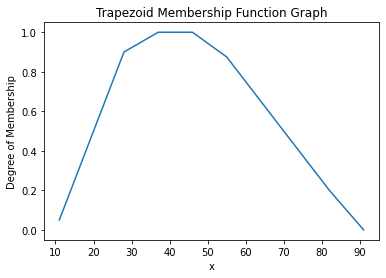

In [ ]:
plt.plot(x_vals, vals)
plt.title('Trapezoid Membership Function Graph')
plt.xlabel('x')
plt.ylabel('Degree of Membership')
plt.show()

In [ ]:
z = smallest_of_max(x_vals)
z

11

In [ ]:
z = largest_of_max(x_vals)
z

91

In [ ]:
z = centroid_of_area(vals,x_vals)
z

45.846846846846844

In [ ]:
z = mean_of_max(x_vals)
z

50.6

### **Task 3**

####Variable definition
define input and output variables

In [135]:
x = np.arange(-20,20,1)
y = np.arange(-20,20,1)
# np.linespace(-20,20,10)

####Generate membership function
Generate respective membership functions for the input and output variables.

In [136]:
#define a function to generate input and output membership functions
def custom_trapmf(x,param):
  return [trapezoid(i,param[0],param[1],param[2],param[3]) for i in x]

Create function to return membership functions for both input and output variables

In [137]:
def calc_input_mf(x)->tuple:
  small_in = custom_trapmf(x,[-20,-15,-6,-3])
  medium_in =custom_trapmf(x,[-6,-3,3,6])
  large_in = custom_trapmf(x,[3,6,15,20])
  return (small_in,medium_in,large_in)

def calc_output_mf(y)->tuple:
  small_out = custom_trapmf(y,[-2.46,-1.46,1.46,2.46])
  medium_out =custom_trapmf(y,[1.46,2.46,5,7])
  large_out = custom_trapmf(y,[5,7,13,15])
  return (small_out,medium_out,large_out)

####Visualization of UoD
Visualize the UoD created for this fuzzy controller

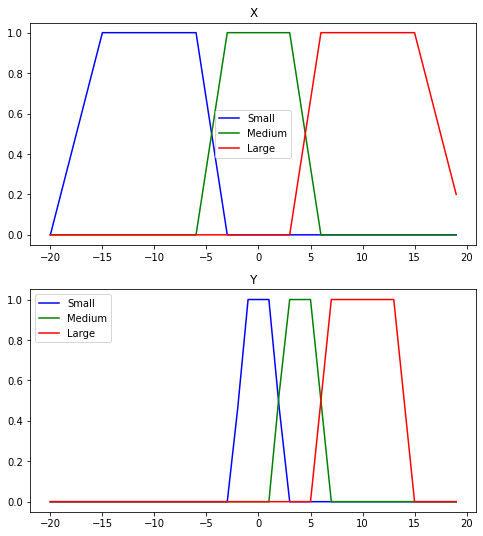

In [138]:
# Visualize these universes and membership functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
small_in,medium_in,large_in = calc_input_mf(x)

small_out,medium_out,large_out = calc_output_mf(y)

ax0.plot(x, small_in, 'b', linewidth=1.5, label='Small')
ax0.plot(x, medium_in, 'g', linewidth=1.5, label='Medium')
ax0.plot(x, large_in, 'r', linewidth=1.5, label='Large')
ax0.set_title('X')
ax0.legend()

ax1.plot(y, small_out, 'b', linewidth=1.5, label='Small')
ax1.plot(y, medium_out, 'g', linewidth=1.5, label='Medium')
ax1.plot(y, large_out, 'r', linewidth=1.5, label='Large')
ax1.set_title('Y')
ax1.legend()

Create functions to calculate degree of membership for each input variable and output variable. 

In [143]:
# Function to return all degrees of membership for each set when a particular is supplied
def cal_input_dom(x):
    small = trapezoid(x,-20,-15,-6,-3)
    medium = trapezoid(x,-6,-3,3,6)
    large = trapezoid(x,3,6,15,20)
    return small,medium,large
def cal_output_dom(y):
    small = trapezoid(y,-2.46,-1.46,1.46,2.46)
    medium = trapezoid(y,1.46,2.46,5,7)
    large = trapezoid(5,7,13,15)
    return small,medium, large


####Testing the Inputs

Loop through the inputs and apply all the applicable rulles.
Calculate the estimated output for each input and store results in a list 

In [144]:
test_inputs = [-8,-5,0,5,8]
aggregated_outputs = [] # List to hold aggregated results

for inp in test_inputs:
  # Generate dom for all inputs
  s_in,m_in,l_in = cal_input_dom(inp)

  # Apply rule 1
  # IF X is small then Y is small
  small_out_activation = np.fmin(s_in,small_out)
  
  # Apply rule 2
  # IF X is medium then Y is medium
  medium_out_activation = np.fmin(m_in,medium_out)

  # Apply rule 3
  # IF X is large then Y is large
  large_out_activation = np.fmin(l_in,large_out)

  # Aggregated result
  agg = np.fmax(small_out_activation,medium_out_activation,large_out_activation)
  aggregated_outputs.append(agg)

#### Display Outputs
Display all the calulated output values for each of the input values provided.
An observation made here is that the output values are proportional to the input values. Thus for increasing inputs, outputs increase as well. 

In [145]:
# Compute the  centroid of area
for agg in aggregated_outputs:
  output = centroid_of_area(agg,y)
  print(output)

0.0
1.4106583072100314
3.9801980198019797
4.0
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
